In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_train=pd.read_csv('train.csv')

In [3]:
df_test=pd.read_csv('test.csv')

In [4]:
df_train.head(5)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [5]:
df_test.head(5)

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


In [6]:
df=pd.concat([df_train,df_test],ignore_index=True)

In [7]:
df.head(10)

,id,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,...,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,target
0,7,0.6,0.5,0.2,3,1,10,1,10,1,...,0,0,11,0,1,0,0.7,0.2,0.718070,0.0
1,9,0.3,0.1,0.3,2,1,9,5,8,1,...,0,0,3,0,0,1,0.8,0.4,0.766078,0.0
2,13,0.5,0.7,0.1,2,2,9,1,8,2,...,0,0,12,1,0,0,0.0,0.0,-1.000000,0.0
3,16,0.6,0.9,0.1,2,4,7,1,8,4,...,0,0,8,1,0,0,0.9,0.2,0.580948,0.0
4,17,0.4,0.6,0.0,2,2,6,3,10,2,...,0,0,9,1,0,0,0.7,0.6,0.840759,0.0
5,19,0.7,0.8,0.4,3,1,8,2,11,3,...,0,0,6,1,0,0,0.9,1.8,2.332649,0.0
6,20,0.2,0.6,0.5,2,2,8,1,8,3,...,0,0,8,1,0,0,0.6,0.1,0.617454,0.0
7,22,0.1,0.5,0.1,1,2,7,1,6,1,...,0,0,13,1,0,0,0.7,0.4,0.607248,0.0
8,26,0.9,0.8,0.6,3,1,7,3,9,4,...,0,0,6,1,0,0,0.9,0.7,0.901388,0.0
9,28,0.7,0.8,0.8,2,2,8,2,9,1,...,0,0,4,0,0,1,0.9,1.4,2.316652,1.0


In [8]:
print("No of raw features:%d"%len(df.columns))
print("No of records:%d"%len(df.index))

No of raw features:59
No of records:1488028


In [9]:
print("Proportion of claims in the data:%.4f"%df['target'][~df['target'].isnull()].mean())
print("Only 3.6% of the records are 1, so there is huge imabalace in data")

Proportion of claims in the data:0.0364
Only 3.6% of the records are 1, so there is huge imabalace in data


In [10]:
for p in df.columns:
    print("Data Type of %s is %s"%(p,df[p].dtype))

Data Type of id is int64
Data Type of ps_calc_01 is float64
Data Type of ps_calc_02 is float64
Data Type of ps_calc_03 is float64
Data Type of ps_calc_04 is int64
Data Type of ps_calc_05 is int64
Data Type of ps_calc_06 is int64
Data Type of ps_calc_07 is int64
Data Type of ps_calc_08 is int64
Data Type of ps_calc_09 is int64
Data Type of ps_calc_10 is int64
Data Type of ps_calc_11 is int64
Data Type of ps_calc_12 is int64
Data Type of ps_calc_13 is int64
Data Type of ps_calc_14 is int64
Data Type of ps_calc_15_bin is int64
Data Type of ps_calc_16_bin is int64
Data Type of ps_calc_17_bin is int64
Data Type of ps_calc_18_bin is int64
Data Type of ps_calc_19_bin is int64
Data Type of ps_calc_20_bin is int64
Data Type of ps_car_01_cat is int64
Data Type of ps_car_02_cat is int64
Data Type of ps_car_03_cat is int64
Data Type of ps_car_04_cat is int64
Data Type of ps_car_05_cat is int64
Data Type of ps_car_06_cat is int64
Data Type of ps_car_07_cat is int64
Data Type of ps_car_08_cat is int

All the data is imported as numbers,so no need to do any conversions 

In [11]:
df_train.columns

Index([u'id', u'target', u'ps_ind_01', u'ps_ind_02_cat', u'ps_ind_03',
       u'ps_ind_04_cat', u'ps_ind_05_cat', u'ps_ind_06_bin', u'ps_ind_07_bin',
       u'ps_ind_08_bin', u'ps_ind_09_bin', u'ps_ind_10_bin', u'ps_ind_11_bin',
       u'ps_ind_12_bin', u'ps_ind_13_bin', u'ps_ind_14', u'ps_ind_15',
       u'ps_ind_16_bin', u'ps_ind_17_bin', u'ps_ind_18_bin', u'ps_reg_01',
       u'ps_reg_02', u'ps_reg_03', u'ps_car_01_cat', u'ps_car_02_cat',
       u'ps_car_03_cat', u'ps_car_04_cat', u'ps_car_05_cat', u'ps_car_06_cat',
       u'ps_car_07_cat', u'ps_car_08_cat', u'ps_car_09_cat', u'ps_car_10_cat',
       u'ps_car_11_cat', u'ps_car_11', u'ps_car_12', u'ps_car_13',
       u'ps_car_14', u'ps_car_15', u'ps_calc_01', u'ps_calc_02', u'ps_calc_03',
       u'ps_calc_04', u'ps_calc_05', u'ps_calc_06', u'ps_calc_07',
       u'ps_calc_08', u'ps_calc_09', u'ps_calc_10', u'ps_calc_11',
       u'ps_calc_12', u'ps_calc_13', u'ps_calc_14', u'ps_calc_15_bin',
       u'ps_calc_16_bin', u'ps_calc_17_bin',

In [12]:
df_test.columns

Index([u'id', u'ps_ind_01', u'ps_ind_02_cat', u'ps_ind_03', u'ps_ind_04_cat',
       u'ps_ind_05_cat', u'ps_ind_06_bin', u'ps_ind_07_bin', u'ps_ind_08_bin',
       u'ps_ind_09_bin', u'ps_ind_10_bin', u'ps_ind_11_bin', u'ps_ind_12_bin',
       u'ps_ind_13_bin', u'ps_ind_14', u'ps_ind_15', u'ps_ind_16_bin',
       u'ps_ind_17_bin', u'ps_ind_18_bin', u'ps_reg_01', u'ps_reg_02',
       u'ps_reg_03', u'ps_car_01_cat', u'ps_car_02_cat', u'ps_car_03_cat',
       u'ps_car_04_cat', u'ps_car_05_cat', u'ps_car_06_cat', u'ps_car_07_cat',
       u'ps_car_08_cat', u'ps_car_09_cat', u'ps_car_10_cat', u'ps_car_11_cat',
       u'ps_car_11', u'ps_car_12', u'ps_car_13', u'ps_car_14', u'ps_car_15',
       u'ps_calc_01', u'ps_calc_02', u'ps_calc_03', u'ps_calc_04',
       u'ps_calc_05', u'ps_calc_06', u'ps_calc_07', u'ps_calc_08',
       u'ps_calc_09', u'ps_calc_10', u'ps_calc_11', u'ps_calc_12',
       u'ps_calc_13', u'ps_calc_14', u'ps_calc_15_bin', u'ps_calc_16_bin',
       u'ps_calc_17_bin', u'ps_calc_

In [13]:
df.columns

Index([u'id', u'ps_calc_01', u'ps_calc_02', u'ps_calc_03', u'ps_calc_04',
       u'ps_calc_05', u'ps_calc_06', u'ps_calc_07', u'ps_calc_08',
       u'ps_calc_09', u'ps_calc_10', u'ps_calc_11', u'ps_calc_12',
       u'ps_calc_13', u'ps_calc_14', u'ps_calc_15_bin', u'ps_calc_16_bin',
       u'ps_calc_17_bin', u'ps_calc_18_bin', u'ps_calc_19_bin',
       u'ps_calc_20_bin', u'ps_car_01_cat', u'ps_car_02_cat', u'ps_car_03_cat',
       u'ps_car_04_cat', u'ps_car_05_cat', u'ps_car_06_cat', u'ps_car_07_cat',
       u'ps_car_08_cat', u'ps_car_09_cat', u'ps_car_10_cat', u'ps_car_11',
       u'ps_car_11_cat', u'ps_car_12', u'ps_car_13', u'ps_car_14',
       u'ps_car_15', u'ps_ind_01', u'ps_ind_02_cat', u'ps_ind_03',
       u'ps_ind_04_cat', u'ps_ind_05_cat', u'ps_ind_06_bin', u'ps_ind_07_bin',
       u'ps_ind_08_bin', u'ps_ind_09_bin', u'ps_ind_10_bin', u'ps_ind_11_bin',
       u'ps_ind_12_bin', u'ps_ind_13_bin', u'ps_ind_14', u'ps_ind_15',
       u'ps_ind_16_bin', u'ps_ind_17_bin', u'ps_ind_18_b

** Exploring Ind variables **

**ORDINAL VARIABLES**

** ps_ind_01**

In [14]:
df['ps_ind_01'].unique()

array([2, 1, 5, 0, 4, 3, 6, 7])

In [15]:
df['ps_ind_01'].value_counts()

0    469109
1    359925
2    205761
5    153663
3    127634
4     84045
6     44486
7     43405
Name: ps_ind_01, dtype: int64

In [16]:
df.groupby('ps_ind_01')['target'].mean()

ps_ind_01
0    0.033221
1    0.033629
2    0.036863
3    0.040963
4    0.045132
5    0.040316
6    0.043151
7    0.042131
Name: target, dtype: float64

In [17]:
print("Number of null values in ps_ind_01:%d"%df['ps_ind_01'][df['ps_ind_01']==-1].sum())

Number of null values in ps_ind_01:0


** ps_ind_03** 

In [18]:
df['ps_ind_03'].unique()

array([ 5,  7,  9,  2,  0,  4,  3,  1, 11,  6,  8, 10])

In [19]:
df['ps_ind_03'].value_counts()

2     240652
3     204836
1     170922
4     167980
5     157043
6     150987
7     130452
8      98528
9      63551
0      38878
10     35863
11     28336
Name: ps_ind_03, dtype: int64

In [20]:
df.groupby('ps_ind_03')['target'].mean()

ps_ind_03
0     0.062846
1     0.037136
2     0.030340
3     0.029559
4     0.033163
5     0.038820
6     0.041800
7     0.041422
8     0.038949
9     0.035383
10    0.040527
11    0.041074
Name: target, dtype: float64

**ps_ind_14**

In [21]:
df['ps_ind_14'].value_counts()

0    1472125
1      13707
2       1847
3        330
4         19
Name: ps_ind_14, dtype: int64

In [22]:
df['ps_ind_14'].unique()

array([0, 1, 2, 3, 4])

In [23]:
df.groupby('ps_ind_14')['target'].mean()

ps_ind_14
0    0.036301
1    0.049682
2    0.048387
3    0.066176
4    0.200000
Name: target, dtype: float64

**ps_ind_15**

In [24]:
df['ps_ind_15'].unique()

array([11,  3, 12,  8,  9,  6, 13,  4, 10,  5,  7,  2,  0,  1])

In [25]:
df['ps_ind_15'].value_counts()

7     163865
8     149445
6     145977
10    135354
11    133059
9     113902
12    112023
5     106079
4     104192
13     87768
3      81057
0      78880
2      46951
1      29476
Name: ps_ind_15, dtype: int64

In [26]:
df.groupby('ps_ind_15')['target'].mean()

ps_ind_15
0     0.042795
1     0.046053
2     0.044926
3     0.038801
4     0.038999
5     0.039128
6     0.039840
7     0.039350
8     0.035940
9     0.030925
10    0.034560
11    0.030480
12    0.030702
13    0.030860
Name: target, dtype: float64

**ps_ind_02_cat**

In [27]:
df['ps_ind_02_cat'].unique()

array([ 2,  1,  4,  3, -1])

In [28]:
df['ps_ind_02_cat'].value_counts()

 1    1079327
 2     309747
 3      70172
 4      28259
-1        523
Name: ps_ind_02_cat, dtype: int64

In [29]:
df.groupby('ps_ind_02_cat')['target'].mean()

ps_ind_02_cat
-1    0.185185
 1    0.035725
 2    0.038139
 3    0.037217
 4    0.040780
Name: target, dtype: float64

In [30]:
print("Number of null values in ps_ind_02_cat:%d"%df['ps_ind_02_cat'][df['ps_ind_02_cat']==-1].sum())

Number of null values in ps_ind_02_cat:-523


**ps_ind_04_cat**

In [31]:
df['ps_ind_04_cat'].unique()

array([ 1,  0, -1])

In [32]:
print("Number of null values in ps_ind_04_cat:%d"%df['ps_ind_04_cat'][df['ps_ind_04_cat']==-1].sum())

Number of null values in ps_ind_04_cat:-228


In [33]:
df.groupby('ps_ind_04_cat')['target'].mean()

ps_ind_04_cat
-1    0.397590
 0    0.034790
 1    0.038644
Name: target, dtype: float64

In [34]:
df['ps_ind_04_cat'].value_counts()

 0    866864
 1    620936
-1       228
Name: ps_ind_04_cat, dtype: int64

**ps_ind_05_cat**

In [35]:
df['ps_ind_05_cat'].unique()

array([ 0,  1,  4,  3,  6,  5, -1,  2])

In [36]:
df['ps_ind_05_cat'].value_counts()

 0    1319412
 6      51877
 4      45706
 3      20754
 1      20737
-1      14519
 2      10707
 5       4316
Name: ps_ind_05_cat, dtype: int64

In [37]:
df.groupby('ps_ind_05_cat')['target'].mean()

ps_ind_05_cat
-1    0.083319
 0    0.033865
 1    0.047825
 2    0.075526
 3    0.042998
 4    0.052061
 5    0.048514
 6    0.059336
Name: target, dtype: float64

** Getting dummies for all the categorical variables **

In [38]:
df_ind_02_cat=pd.get_dummies(df['ps_ind_02_cat'],prefix='ps_ind_02_cat',prefix_sep="-")

In [39]:
del(df['ps_ind_02_cat'])

In [40]:
df_ind_04_cat=pd.get_dummies(df['ps_ind_04_cat'],prefix='ps_ind_04_cat',prefix_sep="-")

In [41]:
del(df['ps_ind_04_cat'])

In [42]:
df_ind_05_cat=pd.get_dummies(df['ps_ind_05_cat'],prefix='ps_ind_05_cat',prefix_sep="-")

In [43]:
del(df['ps_ind_05_cat'])

In [44]:
df_ind_02_cat.head(5)

,ps_ind_02_cat--1,ps_ind_02_cat-1,ps_ind_02_cat-2,ps_ind_02_cat-3,ps_ind_02_cat-4
0,0,0,1,0,0
1,0,1,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,1,0,0


In [45]:
del(df_ind_02_cat['ps_ind_02_cat--1'])

In [46]:
df_ind_04_cat.head(5)

,ps_ind_04_cat--1,ps_ind_04_cat-0,ps_ind_04_cat-1
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [47]:
del(df_ind_04_cat['ps_ind_04_cat--1'])

In [48]:
df_ind_05_cat.head(5)

,ps_ind_05_cat--1,ps_ind_05_cat-0,ps_ind_05_cat-1,ps_ind_05_cat-2,ps_ind_05_cat-3,ps_ind_05_cat-4,ps_ind_05_cat-5,ps_ind_05_cat-6
0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0


In [49]:
del(df_ind_05_cat['ps_ind_05_cat--1'])

In [50]:
df_ind_cat=pd.concat([df_ind_02_cat,df_ind_04_cat,df_ind_05_cat],axis=1)

In [51]:
len(df_ind_cat)-len(df)

0

In [52]:
df_ind_cat.columns

Index([u'ps_ind_02_cat-1', u'ps_ind_02_cat-2', u'ps_ind_02_cat-3',
       u'ps_ind_02_cat-4', u'ps_ind_04_cat-0', u'ps_ind_04_cat-1',
       u'ps_ind_05_cat-0', u'ps_ind_05_cat-1', u'ps_ind_05_cat-2',
       u'ps_ind_05_cat-3', u'ps_ind_05_cat-4', u'ps_ind_05_cat-5',
       u'ps_ind_05_cat-6'],
      dtype='object')

** ps_ind_06_bin**

In [53]:
df['ps_ind_06_bin'].unique()

array([0, 1])

In [54]:
df['ps_ind_06_bin'].value_counts()

0    902572
1    585456
Name: ps_ind_06_bin, dtype: int64

In [55]:
df.groupby('ps_ind_06_bin')['target'].mean()

ps_ind_06_bin
0    0.041585
1    0.028537
Name: target, dtype: float64

**ps_ind_07_bin**

In [56]:
df['ps_ind_07_bin'].unique()

array([1, 0])

In [57]:
df.groupby('ps_ind_07_bin')['target'].mean()

ps_ind_07_bin
0    0.032676
1    0.047350
Name: target, dtype: float64

In [58]:
df['ps_ind_07_bin'].value_counts()

0    1105415
1     382613
Name: ps_ind_07_bin, dtype: int64

**ps_ind_08_bin**

In [60]:
df['ps_ind_08_bin'].unique()

array([0, 1])

In [61]:
df['ps_ind_08_bin'].value_counts()

0    1244343
1     243685
Name: ps_ind_08_bin, dtype: int64

In [62]:
df.groupby('ps_ind_08_bin')['target'].mean()

ps_ind_08_bin
0    0.035357
1    0.042012
Name: target, dtype: float64

**ps_ind_09_bin**

In [63]:
df['ps_ind_09_bin'].unique()

array([0, 1])

In [64]:
df['ps_ind_09_bin'].value_counts()

0    1211754
1     276274
Name: ps_ind_09_bin, dtype: int64

In [65]:
df.groupby('ps_ind_09_bin')['target'].mean()

ps_ind_09_bin
0    0.037184
1    0.033211
Name: target, dtype: float64

**ps_ind_10_bin**

In [66]:
df['ps_ind_10_bin'].unique()

array([0, 1])

In [67]:
df['ps_ind_10_bin'].value_counts()

0    1487473
1        555
Name: ps_ind_10_bin, dtype: int64

In [68]:
df.groupby('ps_ind_10_bin')['target'].mean()

ps_ind_10_bin
0    0.036441
1    0.054054
Name: target, dtype: float64

**ps_ind_11_bin**

In [69]:
df['ps_ind_11_bin'].unique()

array([0, 1])

In [70]:
df['ps_ind_11_bin'].value_counts()

0    1485597
1       2431
Name: ps_ind_11_bin, dtype: int64

In [71]:
df.groupby('ps_ind_11_bin')['target'].mean()

ps_ind_11_bin
0    0.036432
1    0.045680
Name: target, dtype: float64

**ps_ind_12_bin**

In [72]:
df['ps_ind_12_bin'].unique()

array([0, 1])

In [73]:
df['ps_ind_12_bin'].value_counts()

0    1474039
1      13989
Name: ps_ind_12_bin, dtype: int64

In [74]:
df.groupby('ps_ind_12_bin')['target'].mean()

ps_ind_12_bin
0    0.036305
1    0.051442
Name: target, dtype: float64

**ps_ind_13_bin**

In [75]:
df['ps_ind_13_bin'].unique()

array([0, 1])

In [76]:
df['ps_ind_13_bin'].value_counts()

0    1486536
1       1492
Name: ps_ind_13_bin, dtype: int64

In [77]:
df.groupby('ps_ind_13_bin')['target'].mean()

ps_ind_13_bin
0    0.036433
1    0.051418
Name: target, dtype: float64

**ps_ind_16_bin**

In [78]:
df['ps_ind_16_bin'].unique()

array([0, 1])

In [79]:
df['ps_ind_16_bin'].value_counts()

1    983116
0    504912
Name: ps_ind_16_bin, dtype: int64

In [80]:
df.groupby('ps_ind_16_bin')['target'].mean()

ps_ind_16_bin
0    0.043714
1    0.032718
Name: target, dtype: float64

**ps_ind_17_bin**

In [81]:
df['ps_ind_17_bin'].unique()

array([1, 0])

In [82]:
df['ps_ind_17_bin'].value_counts()

0    1308465
1     179563
Name: ps_ind_17_bin, dtype: int64

In [83]:
df.groupby('ps_ind_17_bin')['target'].mean()

ps_ind_17_bin
0    0.033870
1    0.055155
Name: target, dtype: float64

**ps_ind_18_bin**

In [84]:
df['ps_ind_18_bin'].unique()

array([0, 1])

In [85]:
df['ps_ind_18_bin'].value_counts()

0    1258333
1     229695
Name: ps_ind_18_bin, dtype: int64

In [86]:
df.groupby('ps_ind_18_bin')['target'].mean()

ps_ind_18_bin
0    0.036084
1    0.038453
Name: target, dtype: float64

**Exploring calc **

**ps_calc_01**

In [67]:
df['ps_calc_01'].value_counts()

0.6    149327
0.0    149227
0.2    149157
0.5    149148
0.1    148797
0.8    148635
0.4    148527
0.3    148476
0.9    148411
0.7    148323
Name: ps_calc_01, dtype: int64

**ps_calc_02**

In [68]:
df['ps_calc_02'].value_counts()

0.5    149334
0.4    149113
0.9    149016
0.2    148887
0.7    148773
0.8    148697
0.0    148646
0.3    148632
0.1    148556
0.6    148374
Name: ps_calc_02, dtype: int64

**ps_calc_03**

In [69]:
df['ps_calc_03'].value_counts()

0.1    149579
0.3    149293
0.8    149092
0.5    148927
0.6    148908
0.9    148672
0.4    148553
0.0    148504
0.7    148434
0.2    148066
Name: ps_calc_03, dtype: int64

**ps_calc_04**

In [70]:
df['ps_calc_04'].value_counts()

2    485574
3    438576
1    270227
4    198267
0     59597
5     35787
Name: ps_calc_04, dtype: int64

**ps_calc_05**

In [71]:
df['ps_calc_05'].value_counts()

2    487503
1    426455
3    297928
0    153919
4    102032
5     18766
6      1425
Name: ps_calc_05, dtype: int64

**ps_calc_06**

In [72]:
df['ps_calc_06'].value_counts()

8     437098
7     350227
9     322361
6     184040
10    107773
5      66566
4      16706
3       2913
2        317
1         26
0          1
Name: ps_calc_06, dtype: int64

**ps_calc_07**

In [73]:
df['ps_calc_07'].value_counts()

3    406921
2    346628
4    305796
1    172836
5    153767
6     51322
0     38224
7     11082
8      1383
9        69
Name: ps_calc_07, dtype: int64

**ps_calc_08**

In [74]:
df['ps_calc_08'].value_counts()

10    379246
9     378846
8     257182
11    228801
7     123797
12     63471
6      43098
5      11180
4       2111
3        265
2         29
1          2
Name: ps_calc_08, dtype: int64

**ps_calc_09**

In [75]:
df['ps_calc_09'].value_counts()

2    456770
3    381570
1    303295
4    191957
0     86476
5     57710
6      9568
7       682
Name: ps_calc_09, dtype: int64

**ps_calc_10**

In [76]:
df['ps_calc_10'].value_counts()

8     205217
7     194499
9     192144
10    163008
6     161555
11    124002
5     115159
12     87453
4      67995
13     57088
14     34429
3      32179
15     19481
2      11471
16     10180
17      5135
1       2652
18      2348
19      1011
20       440
0        309
21       182
22        68
23        16
24         4
25         3
Name: ps_calc_10, dtype: int64

**ps_calc_11**

In [77]:
df['ps_calc_11'].value_counts()

5     256571
4     235407
6     232989
7     180725
3     173074
8     122227
2      95733
9      74547
10     40262
1      35157
11     19962
12      8978
0       6329
13      3801
14      1471
15       524
16       190
17        51
18        23
19         6
20         1
Name: ps_calc_11, dtype: int64

**ps_calc_12**

In [78]:
df['ps_calc_12'].value_counts()

1     507536
2     364715
0     352711
3     175675
4      63648
5      18241
6       4383
7        937
8        149
9         29
10         3
11         1
Name: ps_calc_12, dtype: int64

**ps_calc_13**

In [79]:
df['ps_calc_13'].value_counts()

2     347605
3     332214
1     241100
4     239373
5     136916
0      84026
6      65687
7      27229
8       9685
9       3032
10       889
11       209
12        51
13         9
14         2
15         1
Name: ps_calc_13, dtype: int64

**ps_calc_14**

In [80]:
df['ps_calc_14'].value_counts()

7     217553
8     204937
6     201962
9     171448
5     160704
10    129415
4     106204
11     88435
3      56722
12     55895
13     32216
2      22460
14     17461
15      8674
1       5875
16      4086
17      1913
18       778
0        776
19       326
20       114
21        49
22        20
23         4
28         1
Name: ps_calc_14, dtype: int64

**ps_calc_15_bin**

In [81]:
df['ps_calc_15_bin'].value_counts()

0    1304699
1     183329
Name: ps_calc_15_bin, dtype: int64

**ps_calc_16_bin**

In [82]:
df['ps_calc_16_bin'].value_counts()

1    934169
0    553859
Name: ps_calc_16_bin, dtype: int64

**ps_calc_17_bin**

In [83]:
df['ps_calc_17_bin'].value_counts()

1    825065
0    662963
Name: ps_calc_17_bin, dtype: int64

**ps_calc_18_bin**

In [84]:
df['ps_calc_18_bin'].value_counts()

0    1060145
1     427883
Name: ps_calc_18_bin, dtype: int64

**ps_calc_19_bin**

In [85]:
df['ps_calc_19_bin'].value_counts()

0    968385
1    519643
Name: ps_calc_19_bin, dtype: int64

**ps_calc_20_bin**

In [86]:
df['ps_calc_20_bin'].value_counts()

0    1260681
1     227347
Name: ps_calc_20_bin, dtype: int64

**PS_CAR VARIABLES **

**ps_car_01_cat**

In [87]:
df['ps_car_01_cat'].value_counts()

 11    518725
 7     449617
 6     155779
 10    124587
 4      65720
 9      50501
 5      45082
 8      37603
 3      16682
 0      14844
 2       5242
 1       3379
-1        267
Name: ps_car_01_cat, dtype: int64

In [88]:
df_ps_car_01_cat=pd.get_dummies(df['ps_car_01_cat'],prefix='ps_car_01_cat',prefix_sep="-")

In [89]:
del(df['ps_car_01_cat'])

In [90]:
del(df_ps_car_01_cat['ps_car_01_cat--1'])

**ps_car_02_cat**

In [91]:
df['ps_car_02_cat'].value_counts()

 1    1234979
 0     253039
-1         10
Name: ps_car_02_cat, dtype: int64

In [92]:
df_ps_car_02_cat=pd.get_dummies(df['ps_car_02_cat'],prefix='ps_car_02_cat',prefix_sep="-")

In [93]:
df_ps_car_02_cat.head(5)

,ps_car_02_cat--1,ps_car_02_cat-0,ps_car_02_cat-1
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [94]:
del(df['ps_car_02_cat'])

In [95]:
del(df_ps_car_02_cat['ps_car_02_cat--1'])

**ps_car_03_cat**

In [96]:
df['ps_car_03_cat'].value_counts()

-1    1028142
 1     276842
 0     183044
Name: ps_car_03_cat, dtype: int64

In [97]:
df_ps_car_03_cat=pd.get_dummies(df['ps_car_03_cat'],prefix='ps_car_03_cat',prefix_sep="-")

In [98]:
del(df['ps_car_03_cat'])

In [99]:
df_ps_car_03_cat.head(5)

,ps_car_03_cat--1,ps_car_03_cat-0,ps_car_03_cat-1
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0


In [100]:
del(df_ps_car_03_cat['ps_car_03_cat--1'])

**ps_car_04_cat**

In [101]:
df['ps_car_04_cat'].value_counts()

0    1241334
1      80561
2      59088
8      51211
9      47857
6       3937
3       1713
5       1330
4        627
7        370
Name: ps_car_04_cat, dtype: int64

In [102]:
df_ps_car_04_cat=pd.get_dummies(df['ps_car_04_cat'],prefix='ps_car_04_cat',prefix_sep="-")

In [103]:
del(df['ps_car_04_cat'])

In [104]:
df_ps_car_04_cat.head(5)

,ps_car_04_cat-0,ps_car_04_cat-1,ps_car_04_cat-2,ps_car_04_cat-3,ps_car_04_cat-4,ps_car_04_cat-5,ps_car_04_cat-6,ps_car_04_cat-7,ps_car_04_cat-8,ps_car_04_cat-9
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [105]:
del(df_ps_car_04_cat['ps_car_04_cat-7'])

**ps_car_05_cat**

In [106]:
df['ps_car_05_cat'].value_counts()

-1    666910
 1    431560
 0    389558
Name: ps_car_05_cat, dtype: int64

In [107]:
df_ps_car_05_cat=pd.get_dummies(df['ps_car_05_cat'],prefix='ps_car_05_cat',prefix_sep="-")

In [108]:
del(df['ps_car_05_cat'])

In [109]:
del(df_ps_car_05_cat['ps_car_05_cat--1'])

**ps_car_06_cat**

In [110]:
df['ps_car_06_cat'].value_counts()

11    329890
1     295574
0     275497
14    147714
10     83563
4      77845
15     54151
6      52571
9      43810
7      40643
3      30031
13     15356
17     12548
16     11771
12      5991
2       4123
5       3479
8       3471
Name: ps_car_06_cat, dtype: int64

In [111]:
df_ps_car_06_cat=pd.get_dummies(df['ps_car_06_cat'],prefix='ps_car_06_cat',prefix_sep="-")

In [112]:
del(df['ps_car_06_cat'])

In [113]:
del(df_ps_car_06_cat['ps_car_06_cat-8'])

**ps_car_07_cat**

In [114]:
df['ps_car_07_cat'].value_counts()

 1    1383070
 0      76138
-1      28820
Name: ps_car_07_cat, dtype: int64

In [115]:
df_ps_car_07_cat=pd.get_dummies(df['ps_car_07_cat'],prefix='ps_car_07_cat',prefix_sep="-")

In [116]:
del(df['ps_car_07_cat'])

In [117]:
del(df_ps_car_07_cat['ps_car_07_cat--1'])

**ps_car_8_cat**

In [118]:
df['ps_car_08_cat'].value_counts()

1    1238365
0     249663
Name: ps_car_08_cat, dtype: int64

**ps_car_9_cat**

In [119]:
df['ps_car_09_cat'].value_counts()

 2    883326
 0    486510
 1     72947
 3     36798
 4      7001
-1      1446
Name: ps_car_09_cat, dtype: int64

In [120]:
df_ps_car_09_cat=pd.get_dummies(df['ps_car_09_cat'],prefix='ps_car_09_cat',prefix_sep="-")

In [121]:
del(df['ps_car_09_cat'])

In [122]:
del(df_ps_car_09_cat['ps_car_09_cat--1'])

**ps_car_10_cat**

In [123]:
df['ps_car_10_cat'].value_counts()

1    1475460
0      12136
2        432
Name: ps_car_10_cat, dtype: int64

In [124]:
df_ps_car_10_cat=pd.get_dummies(df['ps_car_10_cat'],prefix='ps_car_10_cat',prefix_sep="-")

In [125]:
del(df['ps_car_10_cat'])

In [126]:
del(df_ps_car_10_cat['ps_car_10_cat-2'])

**ps_car_11**

In [127]:
df['ps_car_11'].value_counts()
df['ps_car_11'][df['ps_car_11']==-1]=3

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [128]:
df['ps_car_11'].value_counts()

3    797394
2    473339
1    152661
0     64634
Name: ps_car_11, dtype: int64

**ps_car_11_cat**

In [129]:
df['ps_car_11_cat'].value_counts()

104    212989
103     61062
64      55391
87      42872
28      31344
5       31198
32      31175
99      30303
65      27800
82      26161
83      23506
38      22952
10      21742
22      20926
68      20733
60      19943
39      19211
70      18927
101     18416
78      18327
12      18326
67      17806
16      17716
11      16667
92      16344
85      15838
48      15198
51      14987
27      14912
7       14249
        ...  
6        6071
21       6070
71       5933
30       5891
24       5857
9        5457
79       5190
102      5132
96       5116
47       5044
15       4645
73       4614
33       4611
91       4553
69       4553
20       4530
59       4479
50       4475
75       4343
45       4316
23       4072
54       4022
4        3894
35       3821
58       3767
97       3692
81       3608
56       3175
18       3066
63       2722
Name: ps_car_11_cat, Length: 104, dtype: int64

In [130]:
df_ps_car_11_cat=pd.get_dummies(df['ps_car_11_cat'],prefix='ps_car_11_cat',prefix_sep="-")

In [131]:
del(df['ps_car_11_cat'])

In [132]:
del(df_ps_car_11_cat['ps_car_11_cat-63'])

In [133]:
list_ps_cat=[df_ps_car_01_cat,df_ps_car_02_cat,df_ps_car_03_cat,df_ps_car_04_cat,df_ps_car_05_cat,df_ps_car_06_cat,
            df_ps_car_07_cat,df_ps_car_09_cat,df_ps_car_10_cat,df_ps_car_11_cat]
df_ps_car_cat=pd.concat(list_ps_cat,axis=1)

**df_ps_car_12**

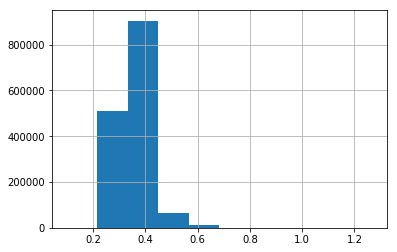

In [134]:
df['ps_car_12'][~(df['ps_car_12']==-1)].hist()

**ps_car_13**

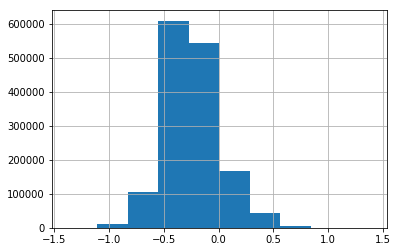

In [135]:
np.log(df['ps_car_13'][~(df['ps_car_13']==-1)]).hist()

**ps_car_14**

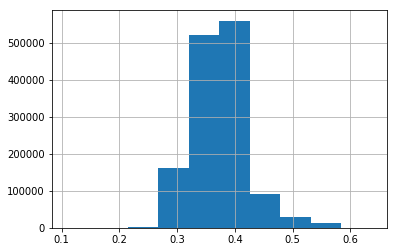

In [136]:
df['ps_car_14'][~(df['ps_car_14']==-1)].hist()

**ps_car_15**

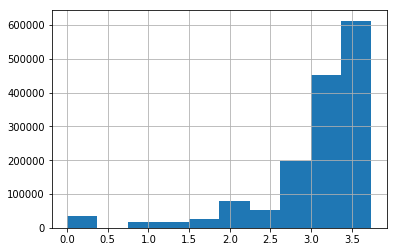

In [137]:
df['ps_car_15'][~(df['ps_car_15']==-1)].hist()

**ps_reg variables **

**ps_reg_01**

In [138]:
df['ps_reg_01'].head(5)

0    0.7
1    0.8
2    0.0
3    0.9
4    0.7
Name: ps_reg_01, dtype: float64

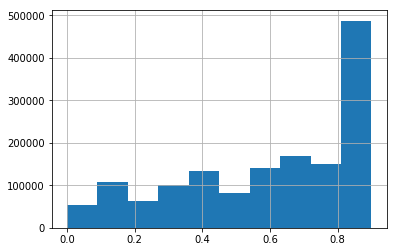

In [139]:
df['ps_reg_01'].hist()

**ps_reg_02**

In [140]:
df['ps_reg_02'].head(5)

0    0.2
1    0.4
2    0.0
3    0.2
4    0.6
Name: ps_reg_02, dtype: float64

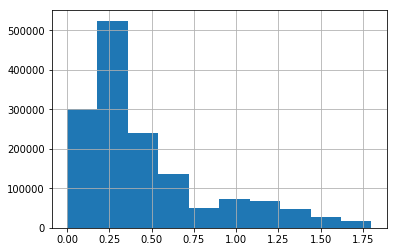

In [141]:
df['ps_reg_02'].hist()

**ps_reg_03**

In [142]:
df['ps_reg_03'].head(5)

0    0.718070
1    0.766078
2   -1.000000
3    0.580948
4    0.840759
Name: ps_reg_03, dtype: float64

(array([  2.69456000e+05,   6.80000000e+01,   2.90934000e+05,
          6.81168000e+05,   2.13502000e+05,   3.12420000e+04,
          1.55200000e+03,   8.10000000e+01,   1.70000000e+01,
          8.00000000e+00]),
 array([-1.        , -0.45764833,  0.08470334,  0.62705501,  1.16940668,
         1.71175835,  2.25411002,  2.79646169,  3.33881336,  3.88116503,
         4.4235167 ]),
 <a list of 10 Patch objects>)

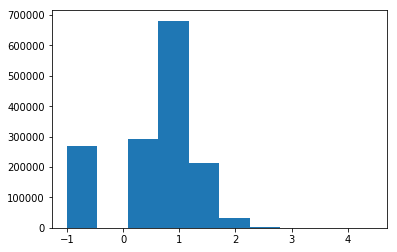

In [143]:
plt.hist(df['ps_reg_03'])

In [144]:
df['ps_reg_03'][df['ps_reg_03']==-1]=1

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


**Processed Data set **

In [145]:
df_final=pd.concat([df,df_ps_car_cat,df_ind_cat],axis=1)

In [146]:
df_final_train=df_final[~(df_final['target'].isnull())]
df_final_test=df_final[df_final['target'].isnull()]

In [147]:
len(df_final_train)

595212

In [148]:
len(df_train)

595212

In [149]:
len(df_final_train.columns)

215

In [150]:
df_final_train.to_csv("final_train.csv")

In [151]:
df_final_test.to_csv("final_test.csv")

** Checking for categorical variables **

In [157]:
categorical_features=[]
features_after_one_hot=0
for k in list(df_train.columns):
    if 'cat' in k :
        categorical_features.append(k)
        features_after_one_hot=features_after_one_hot+len(df_train[k].unique())-1
print("Feature from one hot encoding:%d"%features_after_one_hot)

Feature from one hot encoding:170


In [159]:
print("features after preprocessing %d"%((len(list(df_train.columns)))-14+170))

features after preprocessing 215
